<a href="https://colab.research.google.com/github/naveedkhalid091/Learn_Agentic_AI/blob/main/step02_generative_ai_for_beginners/07(b)_Fine_Tuning_using_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Fine Tuining Using Code:**

Previosuly we have learnt how to fine tune Gemini Model using the AI Sudio but now we will learn how to fine tune a model using code.

In this notebook, you'll learn how to get started with the tuning service using the Python client library for the Gemini API. Here, you'll learn how to tune the text model behind the Gemini API's text generation service.

## **Install the client library**

In [1]:
import google.generativeai as genai

## **Import libraries**

In [2]:
import google.generativeai as genai

In [3]:
from google.colab import userdata
genai.configure(api_key=userdata.get('GOOGLE_API_KEY'))

Check your existing Gemini models that you need to fine tune using `genai.list_tuned_model`.

In [4]:
tuned_models=list(genai.list_tuned_models())

if not tuned_models:
  print("No fine-tuned models found.")
else:
  for model in tuned_models:
    print(model.model_name)

No fine-tuned models found.


## **Create tuned model:**

To create a tuned model, you need to pass your dataset to the model in the `genai.create_tuned_model` method. You can do this be directly defining the `input` and `output` values in the call or importing from a file into a dataframe to pass to the method.

For this example, you will tune a model to generate the next number in the sequence. **For example, if the input is 1, the model should output 2. If the input is one hundred, the output should be one hundred one.**




In [13]:
# below code will generate a list of models which are avaialble for fine-tuning.
base_model = [
    m for m in genai.list_models()
    if "createTunedModel" in m.supported_generation_methods and
    "flash" in m.name][0]
base_model

Model(name='models/gemini-1.5-flash-001-tuning',
      base_model_id='',
      version='001',
      display_name='Gemini 1.5 Flash 001 Tuning',
      description=('Version of Gemini 1.5 Flash that supports tuning, our fast and versatile '
                   'multimodal model for scaling across diverse tasks, released in May of 2024.'),
      input_token_limit=16384,
      output_token_limit=8192,
      supported_generation_methods=['generateContent', 'countTokens', 'createTunedModel'],
      temperature=1.0,
      max_temperature=2.0,
      top_p=0.95,
      top_k=64)

Note: genai.list_models() retrieves a list of available models, which can include both **the base models provided by the platform** and **any tuned models you've created**. So **if you have not already created the models** then this code will not show the **base model** avaialable for fine tuning for the developers.  

## **Create a `Random-number-generator` model**
As we are creating a `random number generator` model so I need to import the random first as below:

In [15]:
## train your model based on the above results using `genai.create_tuned_model`

import random

name = f'generate-num-{random.randint(0,10000)}'
operation = genai.create_tuned_model(
    # You can use a tuned model here too. Set `source_model="tunedModels/..."`
    source_model=base_model.name,
    training_data=[
        {
             'text_input': '1',
             'output': '2',
        },{
             'text_input': '3',
             'output': '4',
        },{
             'text_input': '-3',
             'output': '-2',
        },{
             'text_input': 'twenty two',
             'output': 'twenty three',
        },{
             'text_input': 'two hundred',
             'output': 'two hundred one',
        },{
             'text_input': 'ninety nine',
             'output': 'one hundred',
        },{
             'text_input': '8',
             'output': '9',
        },{
             'text_input': '-98',
             'output': '-97',
        },{
             'text_input': '1,000',
             'output': '1,001',
        },{
             'text_input': '10,100,000',
             'output': '10,100,001',
        },{
             'text_input': 'thirteen',
             'output': 'fourteen',
        },{
             'text_input': 'eighty',
             'output': 'eighty one',
        },{
             'text_input': 'one',
             'output': 'two',
        },{
             'text_input': 'three',
             'output': 'four',
        },{
             'text_input': 'seven',
             'output': 'eight',
        }
    ],
    id = name,
    epoch_count = 100,
    batch_size=4,
    learning_rate=0.001,
)

Your tuned model is immediately added to the list of tuned models, but its status is set to "creating" while the model is tuned.

In [16]:
model = genai.get_tuned_model(f'tunedModels/{name}')

model

TunedModel(name='tunedModels/generate-num-688',
           source_model='models/gemini-1.5-flash-001-tuning',
           base_model='models/gemini-1.5-flash-001-tuning',
           display_name='',
           description='',
           temperature=1.0,
           top_p=0.95,
           top_k=64,
           state=<State.CREATING: 1>,
           create_time=datetime.datetime(2025, 2, 8, 14, 53, 5, 1076, tzinfo=datetime.timezone.utc),
           update_time=datetime.datetime(2025, 2, 8, 14, 53, 5, 1076, tzinfo=datetime.timezone.utc),
           tuning_task=TuningTask(start_time=None,
                                  complete_time=None,
                                  snapshots=[],
                                  hyperparameters=Hyperparameters(epoch_count=100,
                                                                  batch_size=4,
                                                                  learning_rate=0.001)),
           reader_project_numbers=None)

In [17]:
model.state

<State.CREATING: 1>

## Check tuning progress:

In [18]:
operation.metadata

tuned_model: "tunedModels/generate-num-688"
total_steps: 375

Wait for the training to finish using operation.result(), or operation.wait_bar()

In [19]:
import time

for status in operation.wait_bar():
  time.sleep(30)

  0%|          | 0/375 [00:00<?, ?it/s]

You can cancel your tuning job any time using the cancel() method. Uncomment the line below and run the code cell to cancel your job before it finishes.

In [20]:
# operation.cancel()

Once the tuning is complete, you can view the loss curve from the tuning results. The loss curve shows how much the model's predictions deviate from the ideal outputs.

<Axes: xlabel='epoch', ylabel='mean_loss'>

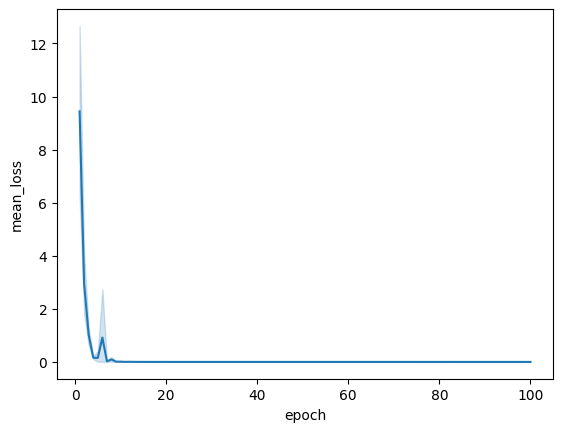

In [21]:
import pandas as pd
import seaborn as sns

model = operation.result()

snapshots = pd.DataFrame(model.tuning_task.snapshots)

sns.lineplot(data=snapshots, x = 'epoch', y='mean_loss')


## **Evaluate your model**

You can use the genai.generate_content method and specify the name of your model to test your model performance.

In [22]:
model = genai.GenerativeModel(model_name=f'tunedModels/{name}')

In [25]:
result = model.generate_content('55')
result.text

'56'

In [27]:
result = model.generate_content('-123455')
result.text

'-123454'

In [28]:
result = model.generate_content('four')
result.text

'five'

In [29]:
result = model.generate_content('quatre')
result.text

'cinq'

In [30]:
result = model.generate_content('III')
result.text

'IV'

In [31]:
result = model.generate_content('七')  # Japanese 7
result.text                            # Japanese 8 is 八!

'八'

It really seems to have picked up the task despite the limited examples, but "next" is a simple concept, see the tuning guide for more guidance on improving performance.

## Update the description

You can update the description of your tuned model any time using the `genai.update_tuned_model` method.

In [32]:
genai.update_tuned_model(f'tunedModels/{name}', {"description":"This is my model."});

In [ ]:
model = genai.get_tuned_model(f'tunedModels/{name}')

model.description

Delete the model:

You can clean up your tuned model list by deleting models you no longer need. Use the genai.delete_tuned_model method to delete a model. If you canceled any tuning jobs, you may want to delete those as their performance may be unpredictable.

In [ ]:
genai.delete_tuned_model(f'tunedModels/{name}')

In [ ]:
# The model no longer exists:

try:
  m = genai.get_tuned_model(f'tunedModels/{name}')
  print(m)
except Exception as e:
  print(f"{type(e)}: {e}")